In [22]:
import cv2
import pandas as pd
import numpy as np


In [36]:
img=cv2.imread('/content/car3.jfif')


In [37]:
print(img)

[[[193 220 234]
  [193 220 234]
  [193 220 234]
  ...
  [169 157 123]
  [208 191 158]
  [237 220 187]]

 [[196 223 237]
  [196 223 237]
  [196 223 237]
  ...
  [242 230 196]
  [244 227 194]
  [238 221 188]]

 [[189 216 230]
  [189 216 230]
  [189 216 230]
  ...
  [255 243 211]
  [236 217 184]
  [212 193 160]]

 ...

 [[107 111 112]
  [101 106 107]
  [123 127 128]
  ...
  [ 20  23  28]
  [ 19  23  28]
  [ 19  23  28]]

 [[ 81  89  96]
  [ 82  92  99]
  [ 90  98 105]
  ...
  [ 24  24  30]
  [ 22  25  30]
  [ 22  25  30]]

 [[ 37  48  56]
  [ 41  52  60]
  [ 47  58  66]
  ...
  [ 24  24  30]
  [ 24  24  30]
  [ 24  24  30]]]


In [38]:
import matplotlib.pyplot as mtp

In [47]:
def detect_plate(img, text=''):
  plate_img=img.copy()
  plate_cascade = cv2.CascadeClassifier('/content/indian_licence_plate.xml') # used to detect whether it is indian licence plates are not
  plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 7)  # if the car belongs to Indian car, it will diplays the values of pixels
  for (x,y,w,h) in plate_rect:
    a,b = (int(0.000*img.shape[0]), int(0.000*img.shape[1])) #parameter tuning
    plate = plate_img[y+a:y+h-a, x+b:x+w-b, :]
    cv2.rectangle(plate_img, (x,y), (x+w, y+h), (51,51,255), 3)
  if text!='':
        plate_img = cv2.putText(plate_img, text, (x-w//2,y-h//2), 
                                cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.5, (51,181,155), 1, cv2.LINE_AA)
  mtp.imshow(plate)
  return plate_img, plate


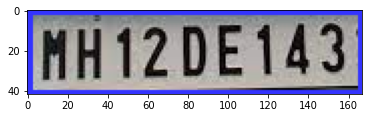

In [48]:
# Getting plate prom the processed image
output_img, plate = detect_plate(img)

In [51]:
# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    mtp.imshow(img_binary_lp, cmap='gray')
    mtp.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    #char_list = find_contours(dimensions, img_binary_lp)

    #return char_list


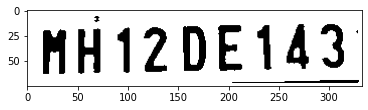

In [52]:
# Let's see the segmented characters
char = segment_characters(plate)

In [53]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 17 kB/s 
     |████████████████████████████████| 47.6 MB 88 kB/s 


In [54]:
import easyocr

In [56]:
reader = easyocr.Reader(['en'])
result = reader.readtext(plate,paragraph="False")
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[1, 3], [164, 3], [164, 40], [1, 40]], 'MHIZ DE143']]

In [57]:
result[0][1]

'MHIZ DE143'

In [62]:
pip install xlsxwriter 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 5.1 MB/s 


In [68]:
img11=cv2.imread('/content/india car.jfif')
img12=cv2.imread('/content/car3.jfif')
img13=cv2.imread('/content/car.png')
img14=cv2.imread('/content/car2.jfif')
images=[img11,img12,img14]

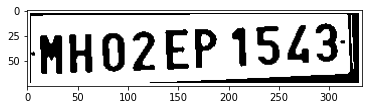

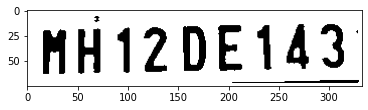

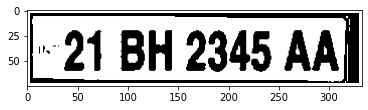

In [70]:
import xlsxwriter
wb=xlsxwriter.Workbook('Number.xlsx')
ws=wb.add_worksheet()
ws.write(0,0,'Number plate')
j=0
for i in images:
  output_img, plate = detect_plate(i)
  # Let's see the segmented characters
  char = segment_characters(plate)
  result = reader.readtext(plate,paragraph="False")
  ws.write(j,0,result[0][1])
  j=j+1
wb.close()

